In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_frame = pd.read_csv("/content/placement.csv")

In [ ]:
data_frame.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

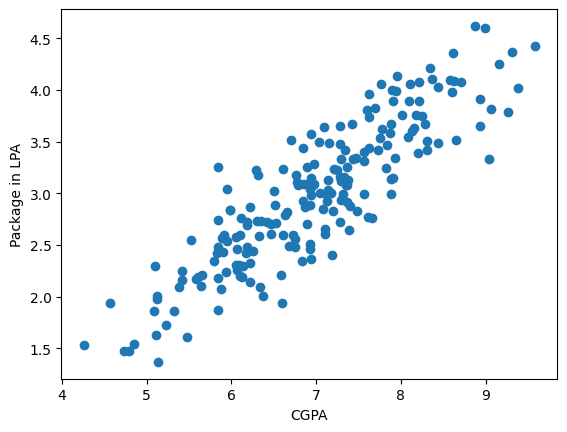

In [ ]:
plt.scatter(data_frame['cgpa'],data_frame['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [ ]:
X = data_frame.iloc[:,:1]
y = data_frame.iloc[:,-1]

In [ ]:
X,y

(     cgpa
 0    6.89
 1    5.12
 2    7.82
 3    7.42
 4    6.94
 ..    ...
 195  6.93
 196  5.89
 197  7.21
 198  7.63
 199  6.22
 
 [200 rows x 1 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test

,cgpa
37,5.90
115,8.35
42,5.95
69,7.30
40,9.38
191,7.28
167,8.13
156,7.38
70,5.79
129,7.29


In [ ]:
y_test

,package
37,2.43
115,4.21
42,2.54
69,2.94
40,4.02
191,3.48
167,3.60
156,3.13
70,2.35
129,3.12


In [ ]:
lr.predict(X_test)

array([2.37326848, 3.77215384, 2.40181716, 3.17263154, 4.36025666,
       3.16121207, 3.64653964, 3.21830943, 2.31046138, 3.1669218 ,
       3.92631671, 3.24114838, 2.72156238, 2.47033399, 2.61878713,
       3.06985629, 2.85859605, 3.51521571, 3.90347777, 3.04701735,
       3.17263154, 3.44669888, 2.51030215, 3.05272708, 2.92140315,
       3.2297289 , 2.4874632 , 3.0869855 , 3.73218568, 3.93202645,
       2.77865975, 1.99071616, 2.50459241, 3.06414655, 4.10331853,
       1.70522935, 2.55598004, 4.16612563, 2.80720843, 4.10902827])

Text(0, 0.5, 'Package in LPA')

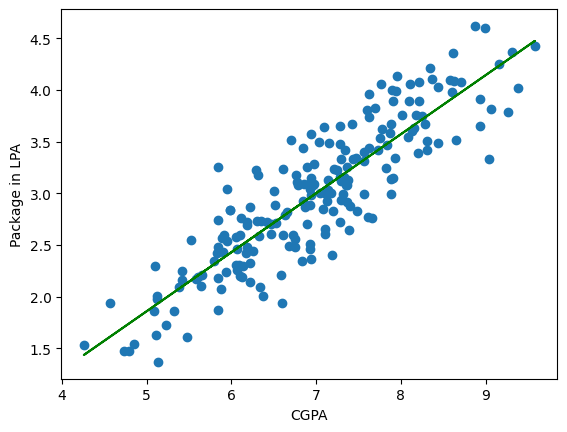

In [ ]:
plt.scatter(data_frame['cgpa'],data_frame['package'])
plt.plot(X_train,lr.predict(X_train),color='green')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [ ]:
# Y = MX + C

In [ ]:
m = lr.coef_
m

array([0.57097362])

In [ ]:
c = lr.intercept_
c

-0.9954758517637043

In [ ]:
m * 5.90 + c

array([2.37326848])

## Create Own Linear model

In [ ]:
data_frame.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
class OWNLR:


  def __init__(self):
    self.m = None
    self.c = None

  def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):


            num = num + ((X_train.iloc[i] - X_train.mean())*(y_train.iloc[i] - y_train.mean()))
            den = den + ((X_train.iloc[i] - X_train.mean())*(X_train.iloc[i] - X_train.mean()))


        self.m = num/den
        self.c = y_train.mean() - (self.m * X_train.mean())

  def predict(self,X_test):
    return self.m * X_test + self.c

In [ ]:
lr = OWNLR()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
X_train.iloc[0]

,27
cgpa,5.42


In [ ]:
lr.predict(X_test.iloc[0])

,0
cgpa,2.373268


In [ ]:
m * X_test.iloc[0] + c

,37
cgpa,2.373268
